# Série Histórica dos preços dos combustíveis no Brasil do primeiro semestre de 2022.

* Fonte: https://dados.gov.br/dataset/serie-historica-de-precos-de-combustiveis-por-revenda

* No primeiro semestre foi obtida uma amostra de 629.539 registros incluindo os 7 tipos de combustíveis através da pesquisa de preços feita em 20.182 estabelecimentos em todo o território nacional.

* Os Produtos pesquisados foram DIESEL, DIESEL S10, ETANOL, GASOLINA, GASOLINA ADITIVADA, GLP, GNV.

* Análise dos dados do estado do Rio de Janeiro.

In [79]:
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

In [25]:
str_sqlite = f"sqlite:///combustivel.db"
engine = create_engine(str_sqlite)

In [65]:
sql = """
SELECT est.cnpj_completo,
    revenda,
    regiao_sigla,
    estado_sigla,
	rua,
	numero,
	complemento,
	bairro,
	cep,
    data_coleta,
    valor_venda,
    bandeira,
    nome_produto	
FROM estabelecimento est
INNER JOIN preco p ON est.cnpj_completo = p.cnpj_completo
INNER JOIN produto prod ON p.produto_id = prod.id
ORDER BY p.data_coleta ASC
"""

df = pd.read_sql_query(sql, con=engine, parse_dates={'data_coleta': {'format': '%d/%m/%Y'}})
df.insert(loc=10, column='mes_coleta', value=df.data_coleta.dt.month)

## Média Nacional de Preço dos Produtos por mês.

In [105]:
df_rj = df[df['estado_sigla'] == 'RJ']

df_rj_DIESEL = df_rj[df_rj['nome_produto'] == 'DIESEL']
df_rj_DIESEL_S10  = df_rj[df_rj['nome_produto'] == 'DIESEL S10']
df_rj_ETANOL  = df_rj[df_rj['nome_produto'] == 'ETANOL']
df_rj_GASOLINA  = df_rj[df_rj['nome_produto'] == 'GASOLINA']
df_rj_GASOLINA_ADITIVADA  = df_rj[df_rj['nome_produto'] == 'GASOLINA ADITIVADA']
df_rj_GLP  = df_rj[df_rj['nome_produto'] == 'GLP']
df_rj_GNV  = df_rj[df_rj['nome_produto'] == 'GNV']

## Média Estado do Rio de Janeiro dos Preço dos Produtos (menos o GLP) por mês.

In [ ]:
print(df_rj.groupby(['nome_produto', 'mes_coleta'])['valor_venda'].mean())

In [156]:
df_media = df_rj.groupby(['nome_produto', 'mes_coleta'])['valor_venda'].mean().reset_index()
df_media = df_media[df_media['nome_produto'] != 'GLP']

In [157]:
df_media

,nome_produto,mes_coleta,valor_venda
0,DIESEL,1,5.416082
1,DIESEL,2,5.541000
2,DIESEL,3,6.209951
3,DIESEL,4,6.504725
4,DIESEL,5,6.723165
5,DIESEL,6,7.106757
6,DIESEL S10,1,5.486683
7,DIESEL S10,2,5.629628
8,DIESEL S10,3,6.305076
9,DIESEL S10,4,6.660227


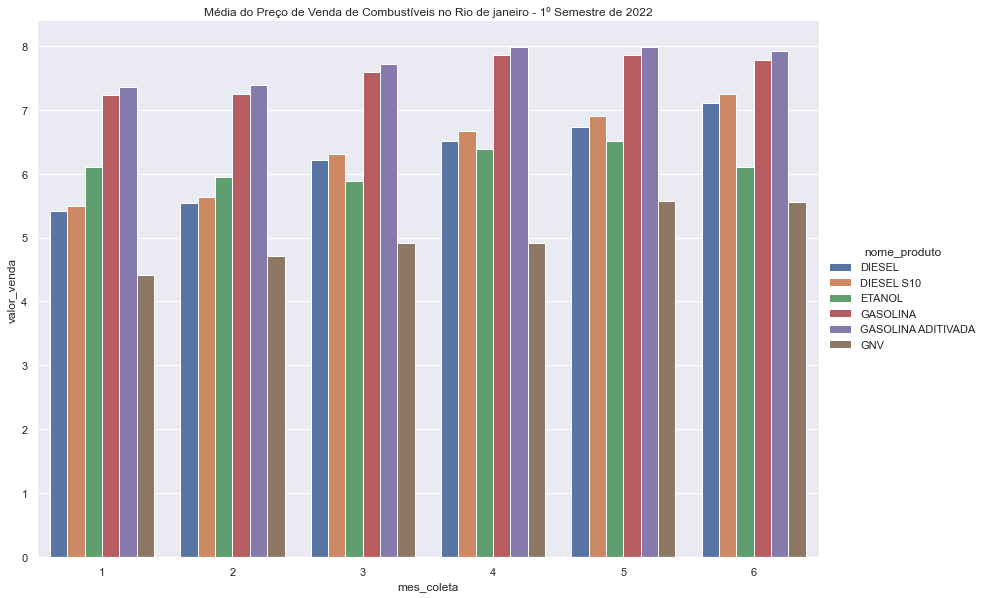

In [152]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bar_plot = sns.catplot(x="mes_coleta", y="valor_venda", hue="nome_produto", kind="bar", data=df_media, height=8.27, aspect=11.7/8.27)
bar_plot.set(title='Média do Preço de Venda de Combustíveis no Rio de janeiro - 1º Semestre de 2022')

[Text(0.5, 1.0, 'Média do Preço de Venda de Combustíveis no Rio de janeiro - 1º Semestre de 2022')]

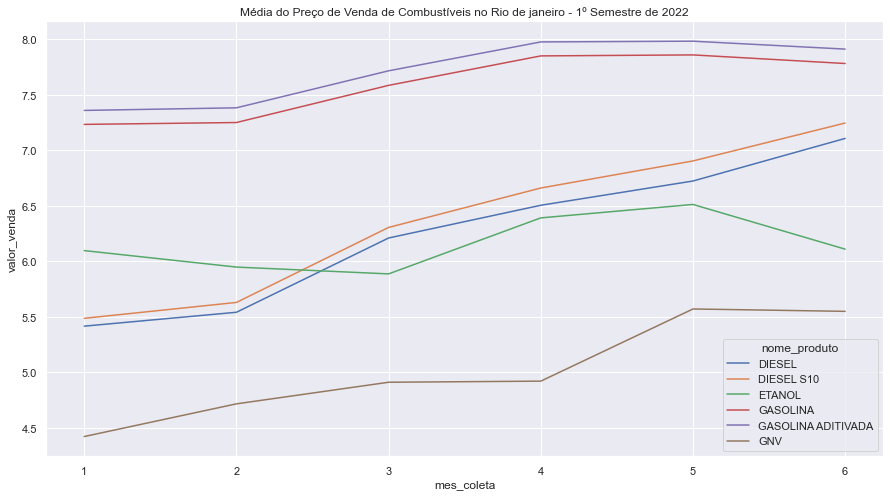

In [151]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
lineplot = sns.lineplot(x="mes_coleta", y="valor_venda", hue="nome_produto", data=df_media)
lineplot.set(title='Média do Preço de Venda de Combustíveis no Rio de janeiro - 1º Semestre de 2022')

## DIESEL no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Diesel no Rio de janeiro - 1º Semestre de 2022')]

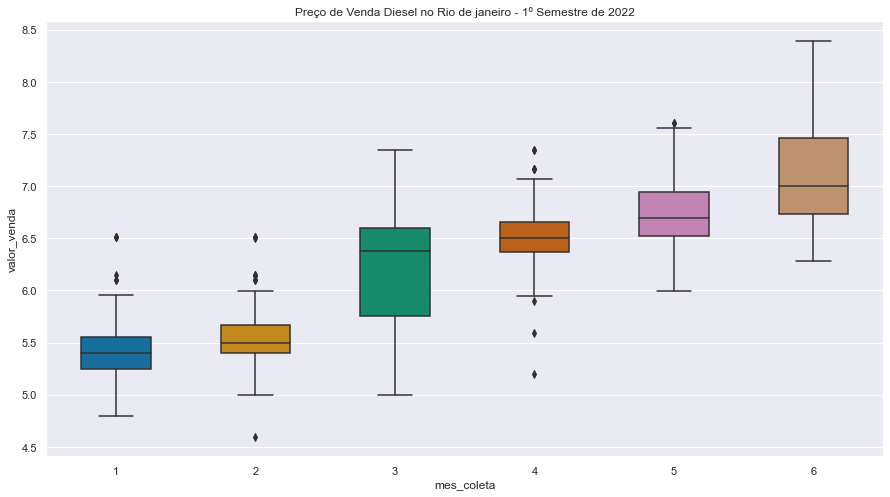

In [132]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_diesel = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_DIESEL, width=0.5, palette="colorblind")
bplot_diesel.set(title='Preço de Venda Diesel no Rio de janeiro - 1º Semestre de 2022')

### 5 Bairros com postos mais baratos

In [167]:
df_rj_DIESEL.nsmallest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
556653,03140728000107,POSTO TRIANGULO ITAPERUNA LTDA,SE,RJ,RUA NOEMIA GODINHO BITTENCOURT,310,None,MAL. CASTELO BRANCO,28300-000,2022-02-28,2,4.599,BRANCA,DIESEL
189520,32877546000111,POSTO DE GASOLINA NOVA VISAO DO LOTE XV EIRELI,SE,RJ,AVENIDA LEONEL DE MOURA BRIZOLA,0,LOTE 15 QUADRAQD 4 ...,DOS FERREIRAS,26183-250,2022-01-10,1,4.799,BRANCA,DIESEL
188047,05540847000182,POSTO PACHEÇÃO LTDA,SE,RJ,ESTRADA DE PACHECOS,1066,None,PACHECO,24732-570,2022-01-10,1,4.899,VIBRA ENERGIA,DIESEL
188056,31704463000168,POSTO COLUBANDE LTDA,SE,RJ,RUA CAP JUVENAL FIGUEIREDO,1 A 3,LOTES,COLUBANDE,24744-560,2022-01-10,1,4.899,VIBRA ENERGIA,DIESEL
208819,28954287000108,POSTO BONSUCESSO LTDA,SE,RJ,AVENIDA CARLOS ALBERTO CHEBABE,1637,None,PARQUE GUARUS,28073-506,2022-01-11,1,4.899,BRANCA,DIESEL


### 5 Bairros com Postos mais caros

In [166]:
df_rj_DIESEL.nlargest(5, ['valor_venda'])

,cnpj_completo,revenda,regiao_sigla,estado_sigla,rua,numero,complemento,bairro,cep,data_coleta,mes_coleta,valor_venda,bandeira,nome_produto
404929,03546620000119,BRASIL 2000 COMBUSTIVEIS LTDA,SE,RJ,AVENIDA DEPUTADO OCTAVIO CABRAL,919,None,CENTRO,23810-302,2022-06-20,6,8.39,IPIRANGA,DIESEL
549349,03546620000119,BRASIL 2000 COMBUSTIVEIS LTDA,SE,RJ,AVENIDA DEPUTADO OCTAVIO CABRAL,919,None,CENTRO,23810-302,2022-06-27,6,8.39,IPIRANGA,DIESEL
404912,36562874000180,POSTO DE GASOLINA SAO SEBASTIAO DE BELFORD ROX...,SE,RJ,AVENIDA JOSE MARIANO DOS PASSOS,"1,089",None,PRATA,26130-570,2022-06-20,6,8.36,RAIZEN,DIESEL
428192,03825735000142,POSTO PRAIA DA RIBEIRA LTDA,SE,RJ,RODOVIA BR 101,S/N,"KM 487,8 - LADO ESQUERDO",BELEM TQ. DA JAPUIBA,23900-000,2022-06-21,6,8.26,IPIRANGA,DIESEL
476928,36506640000115,POSTO BOCAININHA EIRELI,SE,RJ,AVENIDA MINISTRO AMARAL PEIXOTO,800,None,JARDIM BOA VISTA,27350-370,2022-06-23,6,8.24,IPIRANGA,DIESEL


## DIESEL S10 no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Diesel S10 no Rio de janeiro - 1º Semestre de 2022')]

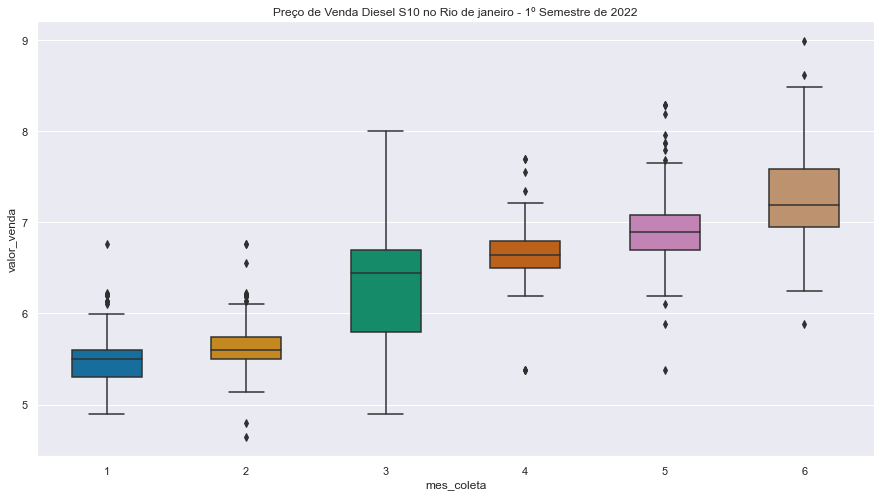

In [131]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_diesel_s10 = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_DIESEL_S10, width=.5, palette="colorblind")
bplot_diesel_s10.set(title='Preço de Venda Diesel S10 no Rio de janeiro - 1º Semestre de 2022')

## Etanol no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Etanol no Rio de janeiro - 1º Semestre de 2022')]

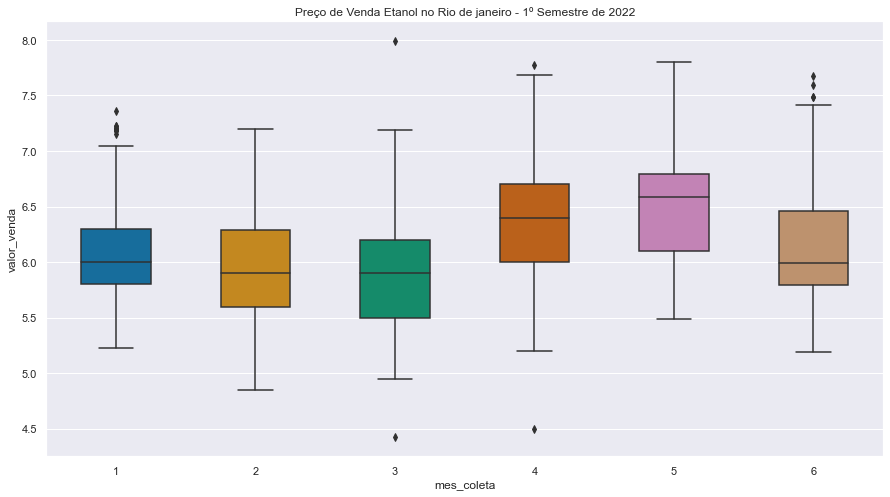

In [130]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_etanol = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_ETANOL, width=.5, palette="colorblind")
bplot_etanol.set(title='Preço de Venda Etanol no Rio de janeiro - 1º Semestre de 2022')

## Gasolina no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Gasolina Rio de janeiro - 1º Semestre de 2022')]

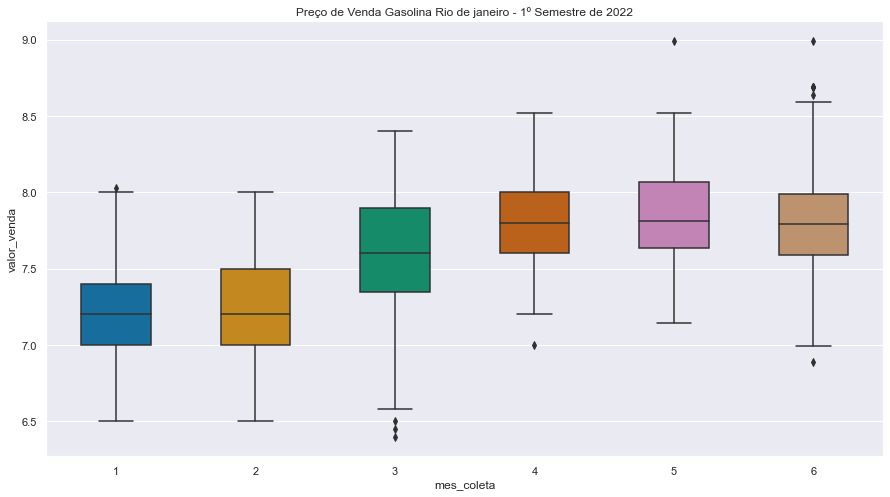

In [129]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_gasolina = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_GASOLINA, width=.5, palette="colorblind")
bplot_gasolina.set(title='Preço de Venda Gasolina no Rio de janeiro - 1º Semestre de 2022')

## Gasolina Aditivada no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda Gasolina Aditivada Rio de janeiro - 1º Semestre de 2022')]

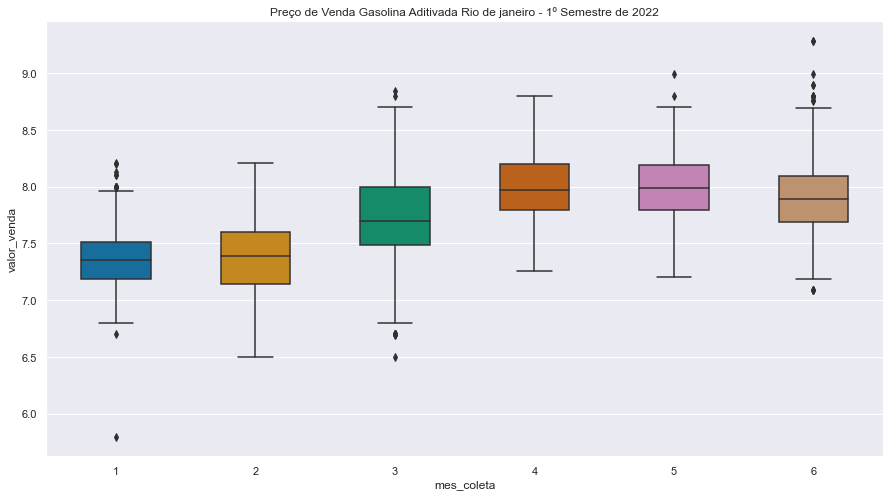

In [127]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_gasolina_adt = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_GASOLINA_ADITIVADA, width=.5, palette="colorblind")
bplot_gasolina_adt.set(title='Preço de Venda Gasolina Aditivada no Rio de janeiro - 1º Semestre de 2022')

## GLP no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda GLP Rio de janeiro - 1º Semestre de 2022')]

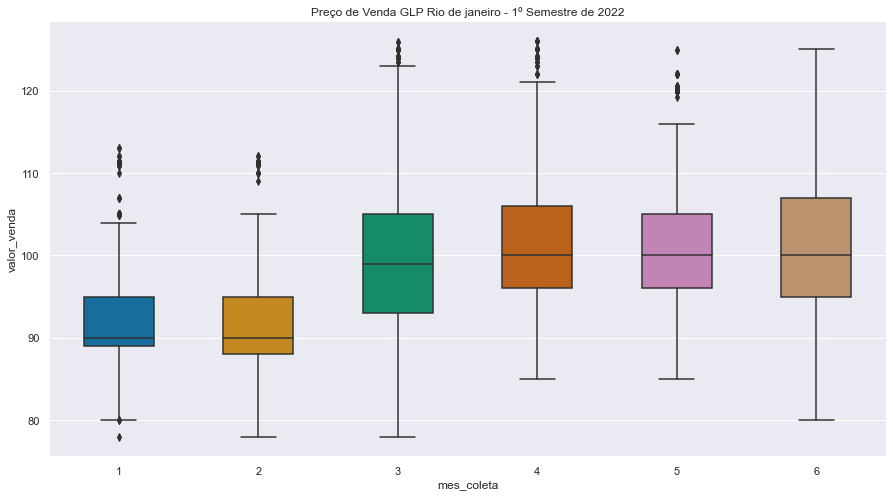

In [126]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_glp = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_GLP, width=0.5, palette="colorblind")
bplot_glp.set(title='Preço de Venda GLP no Rio de janeiro - 1º Semestre de 2022')

## GNV no Rio de Janeiro.

[Text(0.5, 1.0, 'Preço de Venda GNV Rio de janeiro - 1º Semestre de 2022')]

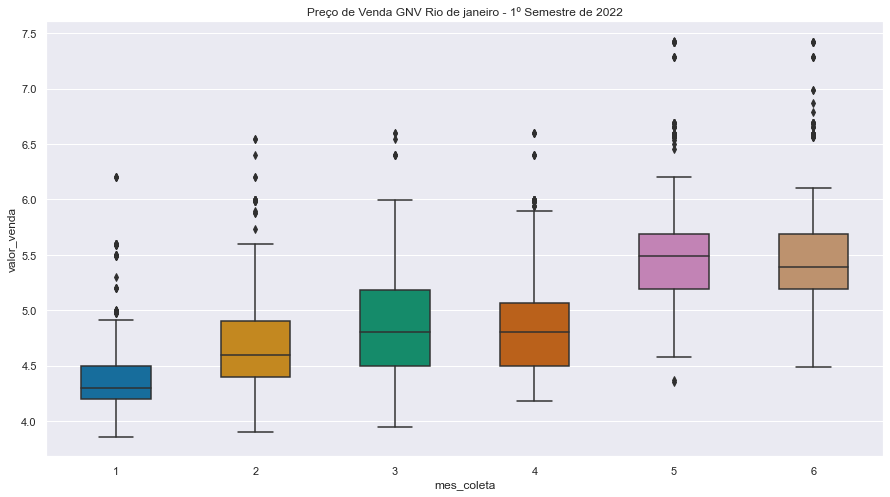

In [125]:
sns.set_theme(style="ticks", palette="pastel")
sns.set(rc = {'figure.figsize':(15,8)})
bplot_gnv = sns.boxplot(y='valor_venda', x='mes_coleta', data=df_rj_GNV, width=0.5, palette="colorblind")
bplot_gnv.set(title='Preço de Venda GNV no Rio de janeiro - 1º Semestre de 2022')